<a href="https://colab.research.google.com/github/ubuangel/RegresionL/blob/master/LossFunction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from mpl_toolkits.mplot3d import Axes3D
from math import e

MSE = 1
MAE = 2
SMAE = 3
LOGCOSH = 4
QUANTILE = 5

In [ ]:
def h(x,w):
  return w[0] + w[1]*x


In [ ]:
def MSE(y,x,w):
 return sum( [ (e[0] - h(e[1],w))**2 for  e in zip(y,x) ])/(len(y))
def MAE(y,x,w):
 return sum( [ abs(e[0] - h(e[1],w)) for  e in zip(y,x) ])/(len(y))




Función de error LOG - COSH

$ L(y,y^p)  = \sum_{i=0}^{n}log(cosh( h(x_i)-y_i) $

In [ ]:
def LOGCOSH(y,x,w):
  return sum([ math.log(math.cosh(h(e[1],w)-e[0]))  for e in zip(y,x)])

Función de error Huber-Loss

$L_{\delta}(y,f(x))= \left\{ \begin{array}{cc}
                              \frac{1}{2}(y-f(x))^2 & for|y-f(x)|\leq \delta  \\
                              \\
                              \delta|y-f(x)|-\frac{1}{2}\delta^2 & otherwise
                              \end{array}
                      \right.$

$f(x)= \left\{ \begin{array}{lcc}
             5 &   si  & x \leq 2 \\
             \\ x^2-6x+10 &  si & 2 < x < 5 \\
             \\ 4x-15 &  si  & x \geq 5
             \end{array}
   \right.$

In [ ]:
def HUBER_LOSS(y,x,w,delta):
  suma = 0 
  for e in zip(y,x):
    if((e[0]-h(e[1],w)) < delta):
      suma += ((e[0]-h(e[1],w))**2)/2
    else:
      suma += delta*abs(e[0]-h(e[1],w))- (delta**2)/2
  return suma

Funcion de error Quantile

$ L_{\delta}(y,y^p)  = \sum_{i=y_i<{y_i}^p} (\delta-1)|y_i-{y_i}^p| + \sum_{i=y_i>={y_i}^p} (\delta)|y_i-{y_i}^p| $


In [ ]:
def QUANTILE(y,x,w,delta):
  suma = 0
  for e in zip(y,x):
    if(e[0]<h(e[1],w)):
      suma +=  (delta-1)*(e[0]-h(e[1],w))
    else:
      suma +=  (delta)*(e[0]-h(e[1],w))
  return suma

In [ ]:
def gradMSE(y,x,w):
  grad_w0 = 2*sum([ (e[0] - h(e[1],w))*(-1) for e in zip(y,x) ])/len(y)
  grad_w1 = 2*sum([ (e[0] - h(e[1],w))*(-e[1]) for e in zip(y,x) ])/len(y)
  return grad_w0, grad_w1

def gradMAE(y,x,w):

  grad_w0 = sum([ (e[0] - h(e[1],w))/abs(e[0] - h(e[1],w))*(-1)    for e in zip(y,x) ])/len(y)
  grad_w1 = sum([ (e[0] - h(e[1],w))/abs(e[0] - h(e[1],w))*(-e[1]) for e in zip(y,x) ])/len(y)
  return grad_w0, grad_w1



Derivadas parciales de LOG-COSH

$ L(y,y^p)  = \sum_{i=0}^{n}log(cosh( h(x_i)-y_i) $

$\frac{ \partial L(y,y^p)}{\partial w_0} = \sum_{i=0}^{n}tanh(h(x_i)-y_i)*1$

$\frac{ \partial L(y,y^p)}{\partial w_1} = \sum_{i=0}^{n}tanh(h(x_i)-y_i)*x$

In [ ]:
def gradLOGCOSH(y,x,w):
  #grad_w0 = sum([ math.tanh(h(e[1],w)-e[0]) for e in zip(y,x)])
  #grad_w1 = sum([ math.tanh(h(e[1],w)-e[0])*e[1] for e in zip(y,x)])
  grad
  return grad_w0, grad_w1

Derivadas parciales de Quantile

$ L_{\delta}(y,y^p)  = \sum_{i=y_i<{y_i}^p} (\delta-1)|y_i-{y_i}^p| + \sum_{i=y_i>={y_i}^p} (\delta)|y_i-{y_i}^p| $

$\frac{ \partial L_\delta(y,y^p)}{\partial w_0} = \sum_{i=(y_i<y^p_i)}(\delta-1)\frac{(y_i-y_i^p)}{|(y_i-y_i^p)|(-1)}+ \sum_{i=(y_i>=y_i^2)}(\delta)\frac{(y_i-y_i^p)}{|(y_i-y_i^p)|(-1)}$

$\frac{ \partial L_\delta(y,y^p)}{\partial w_1} = \sum_{i=(y_i<y^p_i)}(\delta-1)\frac{(y_i-y_i^p)}{|(y_i-y_i^p)|(-x)}+ \sum_{i=(y_i>=y_i^2)}(\delta)\frac{(y_i-y_i^p)}{|(y_i-y_i^p)|(-x)}$


In [ ]:
def gradQUANTILE(y,x,w,delta):
  grad_w0 = 0
  grad_w1 = 0
  for e in zip(y,x):
    if(e[0] < h(e[1],w)):
      grad_w0 += (delta-1)*(e[0]-h(e[1],w))/(abs(e[0]-h(e[1],w)*-1))
      grad_w1 += (delta-1)*(e[0]-h(e[1],w))/(abs(e[0]-h(e[1],w)*-e[1]))
    else:
      grad_w0 += (delta)*(e[0]-h(e[1],w))/(abs(e[0]-h(e[1],w)*-1))
      grad_w1 += (delta)*(e[0]-h(e[1],w))/(abs(e[0]-h(e[1],w)*-e[1]))
  return grad_w0, grad_w1
  

Derivada de la funcion Hubert Loss

In [ ]:
def gradHUBER_LOSS(y,x,w,delta):
  grad_w0 = 0
  grad_w1= 0
  for e in zip(y,x):
    if((e[0]-h(e[1],w)) < delta):
      grad_w0 += (e[0]-h(e[1],w))*-1
      grad_w1 += (e[0]-h(e[1],w))*-e[1]
    else:
      grad_w0 += -1*delta/(e[0]-h(e[1],w))
      grad_w1 += (-1*delta*e[1])/(e[0]-h(e[0],w))
  grad_w0 = grad_w0/len(x)
  grad_w1 = grad_w1/len(x)
  return grad_w0 , grad_w1

In [ ]:
def trainMSE(x_ds, y_ds, w, epochs, alpha):
  list_error = []
  time = []
  
  for i in range(epochs):
    Err = MSE(y_ds,x_ds,w)
    list_error.append(Err)
    time.append(i)
    print(Err)
    grad_w0, grad_w1 = gradMSE(y_ds,x_ds,w)
    w[0] = w[0] - alpha*grad_w0
    w[1] = w[1] - alpha*grad_w1
  
  plt.xlabel("Time")
  plt.ylabel("LossMSE")
  

def trainMAE(x_ds, y_ds, w, epochs, alpha): 
  list_error = []
  time = []
  
  for i in range(epochs):
    Err = MAE(y_ds,x_ds,w)
    list_error.append(Err)
    time.append(i)
    print(Err)
    grad_w0, grad_w1 = gradMAE(y_ds,x_ds,w)
    w[0] = w[0] - alpha*grad_w0
    w[1] = w[1] - alpha*grad_w1

  plt.xlabel("Time")
  plt.ylabel("LossMAE")

def trainLOGCOSH(x_ds, y_ds, w, epochs,alpha): 
  list_error = []
  time = []
  
  for i in range(epochs):
    Err = LOGCOSH(y_ds,x_ds,w)
    list_error.append(Err)
    time.append(i)
    print(Err)
    grad_w0, grad_w1 = gradLOGCOSH(y_ds,x_ds,w)
    w[0] = w[0] - alpha*grad_w0
    w[1] = w[1] - alpha*grad_w1

  plt.xlabel("Time")
  plt.ylabel("LossLOGCOSH") 

def trainQUANTILE(x_ds, y_ds, w, epochs,alpha, delta): 
  list_error = []
  time = []
  
  for i in range(epochs):
    Err = QUANTILE(y_ds,x_ds,w,delta)
    list_error.append(Err)
    time.append(i)
    print(Err)
    grad_w0, grad_w1 = gradQUANTILE(y_ds,x_ds,w,delta)
    w[0] = w[0] - alpha*grad_w0
    w[1] = w[1] - alpha*grad_w1

  plt.xlabel("Time")
  plt.ylabel("LossQUANTILE") 

def trainHUBER_LOSS(x_ds,y_ds,w,epochs,alpha,delta):
  list_error = []
  time = []
  
  for i in range(epochs):
    Err = HUBER_LOSS(y_ds,x_ds,w,delta)
    list_error.append(Err)
    time.append(i)
    print(Err)
    grad_w0, grad_w1 = gradHUBER_LOSS(y_ds,x_ds,w,delta)
    w[0] = w[0] - alpha*grad_w0
    w[1] = w[1] - alpha*grad_w1

  plt.xlabel("Time")
  plt.ylabel("LossHUBERLOSS") 

Entrenamiento con MSE

160.53301449360413
58.46566300875175
21.754045580452267
8.549597385053842
3.800214585454758
2.0919521424959613
1.477520746705422
1.2565188189458147
1.1770257177007841
1.1484305541415005
1.1381423777003654
1.134438865897997
1.1331037304104323
1.1326204554384853
1.132443580141507
1.1323769130057397
1.1323498878094214
1.1323371232719666
1.1323294902454284
1.1323237051536108
1.1323185869572465
1.132313710858154
1.1323089240631672
1.1323041716139648
1.1322994337414882
1.1322947033335675
1.1322899778304625
1.1322852563098604
1.1322805384383927
1.1322758240945308
1.1322711132329357
1.1322664058356768
1.1322617018946832
1.1322570014054303
1.1322523043646684
1.132247610769614
1.1322429206176428
1.1322382339061983
1.1322335506327457
1.132228870794757
1.13222419438971
1.1322195214150883
1.1322148518683728
1.1322101857470506
1.1322055230486068
1.1322008637705332
1.132196207910319
1.1321915554654576
1.1321869064334427
1.1321822608117722


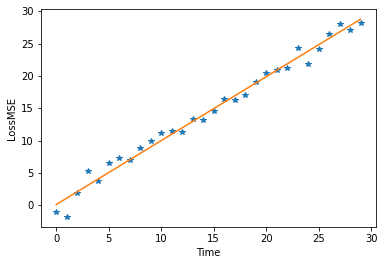

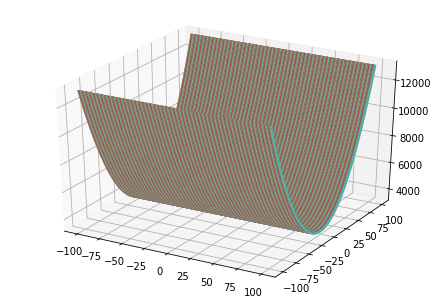

In [ ]:
w = np.random.rand(2)
x_ds = [i for i in range(30)]
y_ds = [ i + np.random.normal(0,1) for i in x_ds ] 

"""
y_ds[5] = 30
y_ds[4] = 50
y_ds[12] = 50
y_ds[0] = 50
"""
trainMSE(x_ds,y_ds, w, 50,0.0007)
plt.plot(x_ds, y_ds,'*')
plt.plot(x_ds, [ h(i,w) for i in x_ds])

#grafica error
fig = plt.figure()
ax = Axes3D(fig)
x = np.linspace(-100,100,500)
y = np.linspace(-100,100,500)
X,Y = np.meshgrid(x,y)

ax.plot(X,Y,MSE(Y,X,w))
#plt.xlabel()
plt.show()



Entrenamiento con MAE

2.0063865543211596
2.0062115543211605
2.0060365543211605
2.0058615543211595
2.00568655432116
2.00551155432116
2.0053365543211603
2.0051615543211603
2.0049865543211602
2.00481155432116
2.0046365543211606
2.0046079871834794
2.0046040982945907
2.004600209405702
2.004596320516813
2.004592431627923
2.0045885427390346
2.0045846538501464
2.004580764961257
2.0045768760723677
2.00457298718348
2.0045782209878267
2.0045807649612564
2.0045768760723686
2.0045729871834794
2.0045690982945903
2.0045652094057016
2.004561320516812
2.0045574316279238
2.004553542739034
2.0045496538501464
2.0045457649612577
2.004541876072368
2.0045379871834785
2.0045432209878276
2.0045457649612564
2.0045418760723672
2.0045379871834794
2.0045340982945903
2.004530209405701
2.004526320516812
2.0045224316279238
2.004518542739034
2.0045146538501455
2.0045107649612572
2.004506876072368
2.0045029871834794
2.0045082209878275
2.004510764961257
2.0045068760723677
[0.35223887 0.99924136]


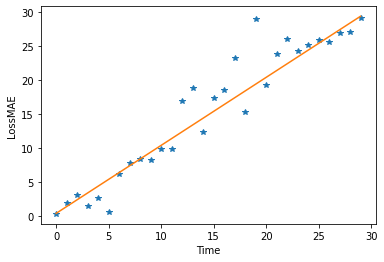

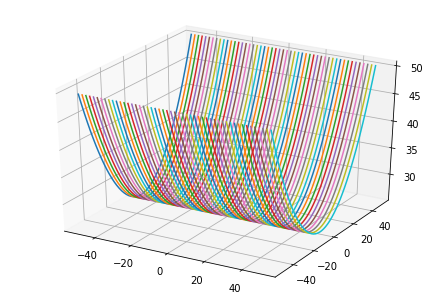

In [ ]:

w = np.random.rand(2)
x_ds = [i for i in range(30)]
y_ds = [ i + np.random.normal(0,3) for i in x_ds ] 
"""
y_ds[5] = 30
y_ds[4] = 50
y_ds[12] = 50
y_ds[0] = 50
"""
trainMAE(x_ds,y_ds, w, 50,0.0007)
plt.plot(x_ds, y_ds,'*')
plt.plot(x_ds, [ h(i,w) for i in x_ds])

print(w)
#grafica error
fig = plt.figure()
ax = Axes3D(fig)
x = np.linspace(-50,50,50)
y = np.linspace(-50,50,50)
X,Y = np.meshgrid(x,y)

ax.plot(X,Y,MAE(Y,X,w))
#plt.xlabel()
plt.show()

Entrenamiento con HUBER_LOSS

20.47523104929103
20.477672325921155
20.48011265394464
20.48255203274405
20.484990461701262
20.4874279401975
20.489864467613348
20.492300043328797
20.494734666723225
20.497168337175427
20.499601054063675
20.502032816765674
20.504463624658595
20.506893477119153
20.509322373523553
20.511750313247536
20.514177295666382
20.516603320154978
20.519028386087758
20.521452492838776
20.523875639781696
20.52629782628983
20.528719051736143
20.531139315493245
20.53355861693345
20.535976955428758
20.538394330350886
20.54081074107129
20.54322618696113
20.54564066739138
20.548054181732724
20.55046672935569
20.552878309630554
20.555288921927428
20.557698565616267
20.560107240066806
20.56251494464871
20.564921678731466
20.567327441684412
20.569732232876827
20.57213605167787
20.574538897456637
20.576940769582098
20.579341667423225
20.58174159034887
20.584140537727915
20.586538508929166
20.58893550332145
20.591331520273556
20.593726559154295
[0.20220791 0.64069563]


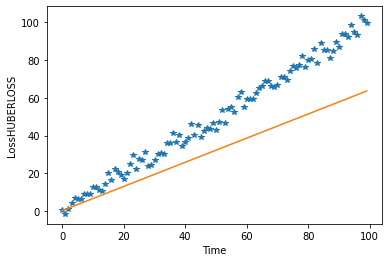

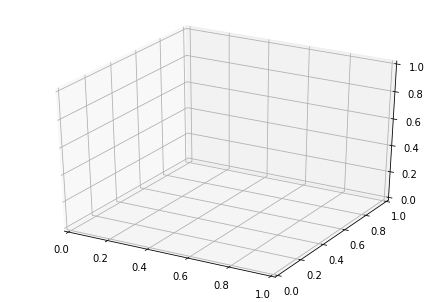

In [ ]:
w = np.random.rand(2)
x_ds = [i for i in range(100)]
y_ds = [ i + np.random.normal(0,3) for i in x_ds ] 
"""
y_ds[5] = 30
y_ds[4] = 50
y_ds[12] = 50
y_ds[0] = 50
"""
trainHUBER_LOSS(x_ds,y_ds, w, 50,0.007,0.01)
plt.plot(x_ds, y_ds,'*')
plt.plot(x_ds, [ h(i,w) for i in x_ds])

print(w)
#grafica error
fig = plt.figure()
ax = Axes3D(fig)
x = np.linspace(-50,50,50)
y = np.linspace(-50,50,50)
X,Y = np.meshgrid(x,y)

#ax.plot(X,Y,HUBER_LOSS(Y,X,w,10))
#plt.xlabel()
plt.show()

Entrenamiento con LOGCOSH

2407.8997874470197
4718.0910849921565
2320.3889350753316
4801.6379415278925
2235.8224126988553
4881.945046157984
2154.5769704845
4958.817319679312
2076.8476422431095
5032.251705149775
2002.6330134756495
5102.396607561016
1931.7775530510426
5169.482783506204
1864.0426014825168
5233.757743425313
1799.1733092496077
5295.440664244381
1736.9443981144739
5354.699076559757
1677.183650943682
5411.640945983637
1619.7797366867894
5466.314587092423
1564.68210457911
5518.710308513719
1511.8991512519083
5568.759693676789
1461.4988000054136
5616.330653852007
1413.6133484693971
5661.2194175471295
1368.4473607720215
5703.145048349284
1326.2829024823757
5741.757384984982
1287.4711036679207
5776.672086605838
1252.3963417363843
5807.540070266722
1221.4059687901943
5834.1387864812905
1194.7185902303825
5856.449424737346
1172.3471923377433
5874.681271147915
1154.075817384671
5889.2325213135355
1139.499939305896
5900.612093832391


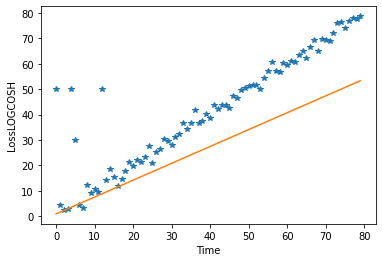

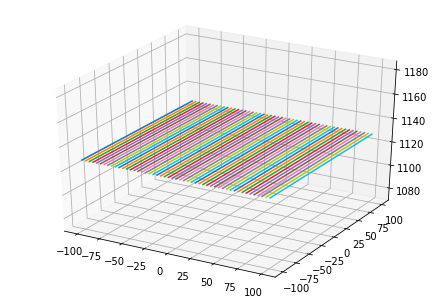

In [ ]:
w = np.random.rand(2)
x_ds = [i for i in range(80)]
y_ds = [ i + np.random.normal(0,2) for i in x_ds ] 

y_ds[5] = 30
y_ds[4] = 50
y_ds[12] = 50
y_ds[0] = 50

trainLOGCOSH(x_ds,y_ds, w, 50,0.0007)
plt.plot(x_ds, y_ds,'*')
plt.plot(x_ds, [ h(i,w) for i in x_ds])

#grafica error
fig = plt.figure()
ax = Axes3D(fig)
x = np.linspace(-100,100,50)
y = np.linspace(-100,100,50)
X,Y = np.meshgrid(x,y)

ax.plot(X,Y,LOGCOSH(y_ds,x_ds,w))
#plt.xlabel()
plt.show()

Entrenamiento con Quantile

In [ ]:
w = np.random.rand(2)
x_ds = [i for i in range(100)]
y_ds = [ i + np.random.normal(0,2) for i in x_ds ] 

y_ds[5] = 30
y_ds[4] = 50
y_ds[12] = 50
y_ds[0] = 50

trainQUANTILE(x_ds,y_ds, w, 50,0.0007,0.03)
plt.plot(x_ds, y_ds,'*')
plt.plot(x_ds, [ h(i,w) for i in x_ds])

106.21357799176837


NameError: ignored